In [ ]:
# Installing the libraries
import nltk
import pandas as pd
import os
from nltk.tokenize import word_tokenize
import numpy as np

In [ ]:
# Reading the dataset
dataset = pd.read_csv('/content/Resume.csv')
dataset.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR

In [ ]:
# Sample code to checking for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64


In [ ]:
dataset['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

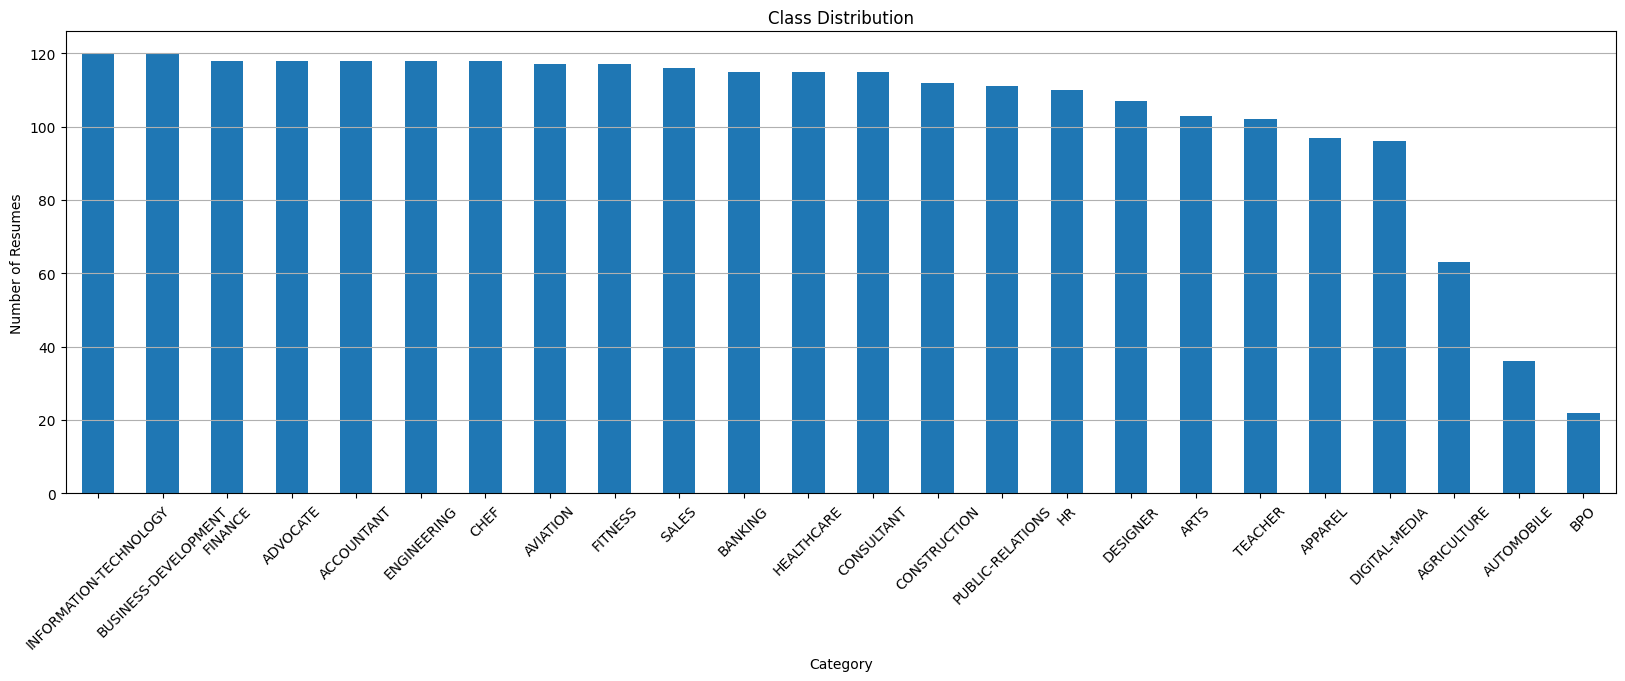

In [ ]:
import matplotlib.pyplot as plt

class_distribution = dataset['Category'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(20, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Resumes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

def tokenize_tweet(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove links
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if not token.startswith(('http', '//t.co/'))]

    return tokens
dataset['tokenized_text'] = dataset['Resume_str'].apply(tokenize_tweet)

In [ ]:
# Print the tokenized tweets
for index, row in dataset.iterrows():
    print(f"Original Text: {row['Resume_str']}")
    print(f"Tokenized Text: {row['tokenized_text']}")
    print("\n")

Original Text:          HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory cont

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Tokenized Text: ['FRONT', 'DESK', 'ATTENDANT', 'Summary', 'Graduated', 'Bridgewater', 'State', 'University', 'in', 'May', '2015', 'with', 'a', 'Bachelor', 'degree', 'in', 'Aviation', 'Management', 'and', 'recently', 'started', 'the', 'MBA', 'Aviation', 'program', 'at', 'Aeronautical', 'University', 'at', 'the', 'Worldwide', 'campus', 'with', 'a', 'concentration', 'on', 'International', 'Business', 'Highlights', 'Double', 'Citizenship', 'American', 'and', 'Brazilian', 'Excellent', 'english', 'communication', 'skills', 'Problem', 'solving', 'abilities', 'Decisive', 'Critical', 'thinking', 'Business', 'systems', 'analysis', 'Interests', 'Aviation', 'Enthusiast', 'and', 'commercial', 'pilot', 'licensed', 'by', 'both', 'ANAC', 'and', 'FAA', 'Languages', 'Bilingual', 'Experience', 'Front', 'Desk', 'Attendant', 'to', 'Company', 'Name', 'City', 'State', 'FBO', 'business', 'Direct', 'service', 'to', 'private', 'airplanes', 'Marshaling', 'fueling', 'and', 'towing', 'of', 'aircraft', 'Airline', 

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

# Load stopwords
stop_words_set = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(row):
    text = row['tokenized_text']
    words = [word for word in text if len(word) > 2 and word.lower() not in stop_words_set]
    return words

# Apply stopwords removal
dataset["tokenized_text"] = dataset.apply(remove_stopwords, axis=1)

In [ ]:
# Print the removed-stopwords text
for index, row in dataset.iterrows():
    print(f"Original Text: {row['Resume_str']}")
    print(f"Tokenized Text: {row['tokenized_text']}")
    print("\n")

Original Text:          HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory cont

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)






Original Text:          BRANCH BANKER III       Accomplishments      Maximize sales volume.  Maintain visual presentation standards that are consistent with division philosophy and direction.  Demonstrate effective written and verbal communication skills.  Assist in recruiting, training and developing Sales Associates.  Develop proficiency in all operational policies and procedures.  Manage time and prioritize tasks.  CUSTOMER SERVICE / SALES Ensure customer service is the #1 priority.  Effectively supervise the sales floor to ensure customer / associate awareness at all times.  Understand and create awareness of the factors to impact sales volume.  LEADERSHIP Motivate and develop associates to meet goals / objectives.  Clearly delegate activities and follow-up on all direction.  Demonstrate teamwork with-in store and company.  Take initiative and use sound judgement.  Lead by example.  PERSONNEL Demonstrate professional image and conduct.  Follow specific divisional dress code poli

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Ensure all values in the 'tokenized_text' column are lists
dataset['tokenized_text'] = dataset['tokenized_text'].apply(lambda x: x if isinstance(x, list) else [])

# Combine tokenized text into sentences
dataset['sentences'] = dataset['tokenized_text'].apply(lambda x: ' '.join(map(str, x)))  # Joining the tokens into a single string

# Split data into features (X) and labels (y)
X = dataset['sentences']
y = dataset['Category']  # Assuming you have a column named 'category' for labels

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)


In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Determine the unique categories
unique_categories = y.unique()

# Initialize lists to store the stratified test data
X_test_stratified = []
y_test_stratified = []

# Loop through each category and split the test data
for category in unique_categories:
    # Filter data for the current category
    X_category = X[y == category]
    y_category = y[y == category]

    # Split the data for the current category
    X_category_train, X_category_test, y_category_train, y_category_test = train_test_split(X_category, y_category, test_size=0.2, random_state=42)

    # Append the test data for the current category to the stratified lists
    X_test_stratified.append(X_category_test)
    y_test_stratified.append(y_category_test)

# Concatenate the stratified test data for all categories
X_test = pd.concat(X_test_stratified)
y_test = pd.concat(y_test_stratified)

# Optionally, you can obtain the training data by removing the test data from the original dataset
X_train = X.drop(X_test.index)
y_train = y.drop(y_test.index)

# Print class distribution for training and testing sets
print("Training Set Class Distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting Set Class Distribution:")
print(y_test.value_counts(normalize=True))

Training Set Class Distribution:
Category
INFORMATION-TECHNOLOGY    0.048558
BUSINESS-DEVELOPMENT      0.048558
FINANCE                   0.047547
ADVOCATE                  0.047547
ACCOUNTANT                0.047547
ENGINEERING               0.047547
CHEF                      0.047547
AVIATION                  0.047041
FITNESS                   0.047041
BANKING                   0.046535
HEALTHCARE                0.046535
SALES                     0.046535
CONSULTANT                0.046535
CONSTRUCTION              0.045018
PUBLIC-RELATIONS          0.044512
HR                        0.044512
DESIGNER                  0.042994
ARTS                      0.041477
TEACHER                   0.040971
APPAREL                   0.038948
DIGITAL-MEDIA             0.038442
AGRICULTURE               0.025291
AUTOMOBILE                0.014163
BPO                       0.008599
Name: proportion, dtype: float64

Testing Set Class Distribution:
Category
AVIATION                  0.047337
FINANCE 

In [ ]:
from sklearn.cluster import KMeans

# Number of clusters equals the number of unique categories
num_clusters = len(unique_categories)

# Initialize KMeans with the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to your TF-IDF vectors
kmeans.fit(X_tfidf)

# Assign cluster labels to each document
cluster_labels = kmeans.labels_

# Assign cluster labels to the DataFrame
dataset['cluster'] = cluster_labels

# Create a mapping between cluster labels and category names
cluster_category_mapping = {}
for i, category in enumerate(unique_categories):
    cluster_category_mapping[i] = category

# Map cluster labels to category names in the DataFrame
dataset['category_from_cluster'] = dataset['cluster'].map(cluster_category_mapping)

# Print the mapping between cluster labels and category names
print("Mapping between Cluster Labels and Category Names:")
print(cluster_category_mapping)

# Optionally, you can print the centroids of the clusters
print("Cluster Centroids:")
print(kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mapping between Cluster Labels and Category Names:
{0: 'HR', 1: 'DESIGNER', 2: 'INFORMATION-TECHNOLOGY', 3: 'TEACHER', 4: 'ADVOCATE', 5: 'BUSINESS-DEVELOPMENT', 6: 'HEALTHCARE', 7: 'FITNESS', 8: 'AGRICULTURE', 9: 'BPO', 10: 'SALES', 11: 'CONSULTANT', 12: 'DIGITAL-MEDIA', 13: 'AUTOMOBILE', 14: 'CHEF', 15: 'FINANCE', 16: 'APPAREL', 17: 'ENGINEERING', 18: 'ACCOUNTANT', 19: 'CONSTRUCTION', 20: 'PUBLIC-RELATIONS', 21: 'BANKING', 22: 'ARTS', 23: 'AVIATION'}
Cluster Centroids:
[[0.00631105 0.         0.         ... 0.         0.         0.        ]
 [0.00489184 0.00070234 0.         ... 0.00125427 0.00114247 0.        ]
 [0.00373161 0.0002833  0.         ... 0.00050042 0.00042663 0.        ]
 ...
 [0.00946733 0.00103389 0.         ... 0.00062192 0.         0.        ]
 [0.00311913 0.00096309 0.         ... 0.00059336 0.         0.        ]
 [0.00362369 0.00037101 0.00110825 ... 0.00127938 0.         0.        ]]


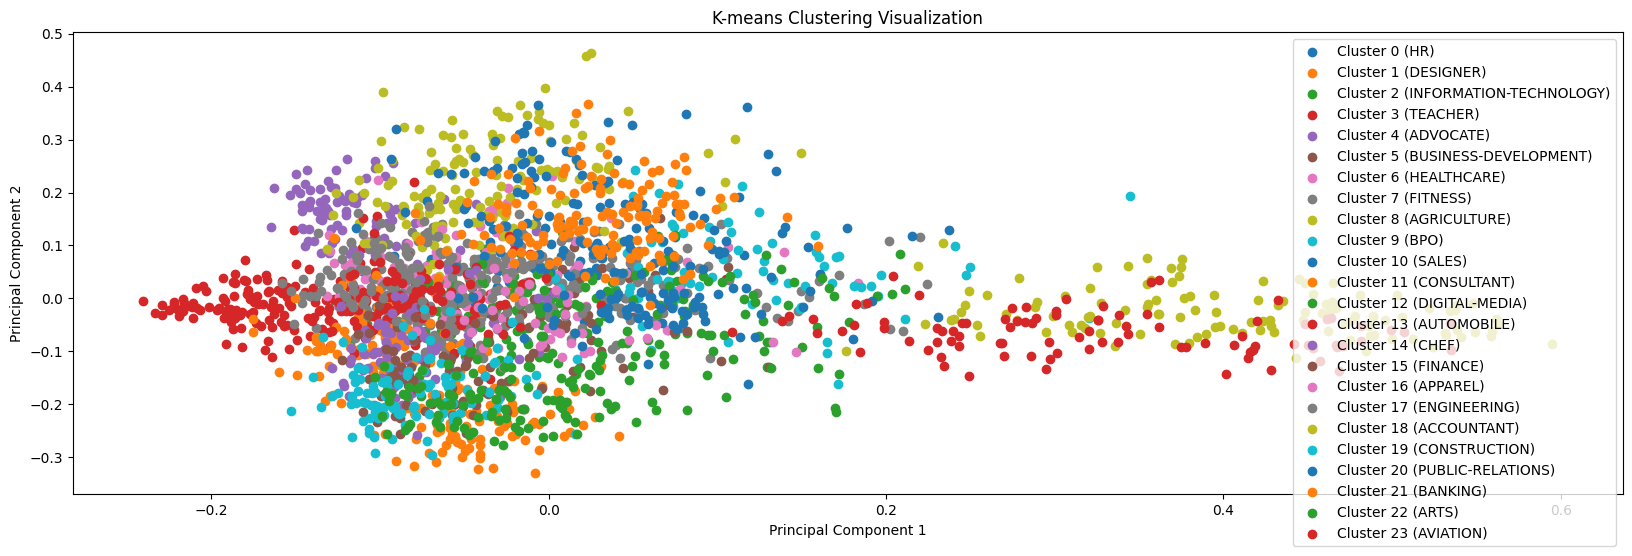

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality of TF-IDF vectors to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Plot clusters with category labels
plt.figure(figsize=(20, 6))
for cluster in range(num_clusters):
    # Get category name for the current cluster
    category_name = cluster_category_mapping[cluster]

    # Plot data points for the current cluster with category label
    plt.scatter(X_pca[cluster_labels == cluster, 0], X_pca[cluster_labels == cluster, 1], label=f'Cluster {cluster} ({category_name})')

plt.title('K-means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert labels to integers
y_encoded = label_encoder.fit_transform(y)

# Convert the encoded labels to a PyTorch tensor
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Convert TF-IDF vectors and labels to PyTorch tensors
X_tensor = torch.tensor(X_tfidf.toarray(), dtype=torch.float32)

# Create a TensorDataset from the tensors
dataset = TensorDataset(X_tensor, y_tensor)

# Define batch size for DataLoader
batch_size = 32

# Create a DataLoader for the dataset
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Define the architecture of the feedforward neural network
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Initialize the feedforward neural network
input_size = X_tensor.shape[1]
hidden_size = 128  # Number of neurons in the hidden layer
output_size = len(y_tensor.unique())  # Number of unique classes
model = FeedForwardNN(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Since it's a classification task
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in data_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(dataset)

    # Print loss for every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/10], Loss: 3.0263
Epoch [2/10], Loss: 2.3362
Epoch [3/10], Loss: 1.6556
Epoch [4/10], Loss: 1.2669
Epoch [5/10], Loss: 1.0050
Epoch [6/10], Loss: 0.7940
Epoch [7/10], Loss: 0.6171
Epoch [8/10], Loss: 0.4726
Epoch [9/10], Loss: 0.3594
Epoch [10/10], Loss: 0.2692


In [ ]:
# Convert TF-IDF vectors of the test set to PyTorch tensor
X_test_tensor = torch.tensor(tfidf_vectorizer.transform(X_test).toarray(), dtype=torch.float32)

# Use the same label encoder that was used for the training set
y_test_encoded = label_encoder.transform(y_test)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

# Set the model to evaluation mode
model.eval()

# Disable gradient computation for evaluation
with torch.no_grad():
    # Forward pass to get predictions
    outputs = model(X_test_tensor)

    # Compute predicted class labels
    _, predicted_labels = torch.max(outputs, 1)

    # Calculate accuracy
    correct = (predicted_labels == y_test_tensor).sum().item()
    total = y_test_tensor.size(0)
    accuracy = correct / total
    print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.9822


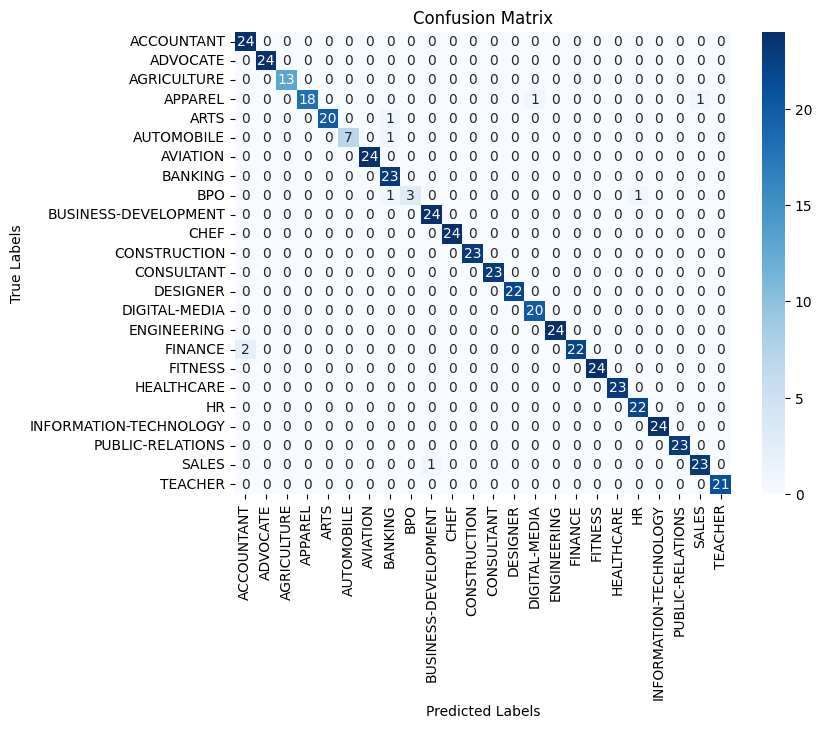

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_tensor.numpy(), predicted_labels.numpy())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()